### The Titans
### Commodity Price Forecasting using AI/ML

In [49]:
#importing the dataset
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from bokeh.plotting import figure, show, output_notebook
from pykalman import KalmanFilter
from sklearn.metrics import mean_squared_error

In [50]:
#Preparing the DataFrame
%matplotlib inline

data=pd.read_csv('E:/Anurag/My_Programs/Commodity_Price_Prediction-master/COFFEE.csv')
df=pd.DataFrame(data,columns=['Close','Date','High','Low','Open','Volume'])

#set the date as index

df['Date']=pd.to_datetime(df['Date'])
df.index=df['Date']

df = df.drop(columns = 'Date')
plt.style.use('ggplot')

In [51]:
print(df.shape)
df.head()

(2149, 5)


,Close,High,Low,Open,Volume
Date,,,,,
2017-01-05,20.540001,20.799999,20.340000,20.340000,179900
2017-01-04,20.209999,20.320000,20.059999,20.100000,276800
2017-01-03,19.610001,19.650000,19.020000,19.379999,290900
2016-12-30,19.559999,19.730000,19.340000,19.600000,225600
2016-12-29,19.290001,19.660000,18.980000,19.000000,283800


In [52]:
df.isnull().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

### DataVisualization

<AxesSubplot:>

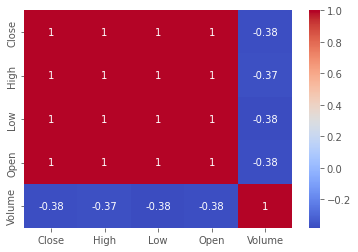

In [53]:
sns.heatmap(df.corr(),
            annot = True,
            cmap='coolwarm'
           )

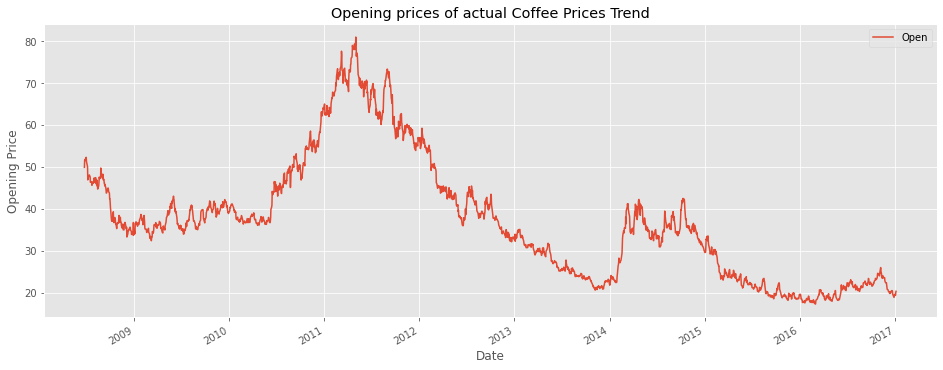

In [54]:
df["Open"].plot(
    figsize=(16,6),
    label = 'Open')
plt.ylabel('Opening Price')
plt.legend()
plt.title('Opening prices of actual Coffee Prices Trend')
plt.show()

c:\users\anurag\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Open')

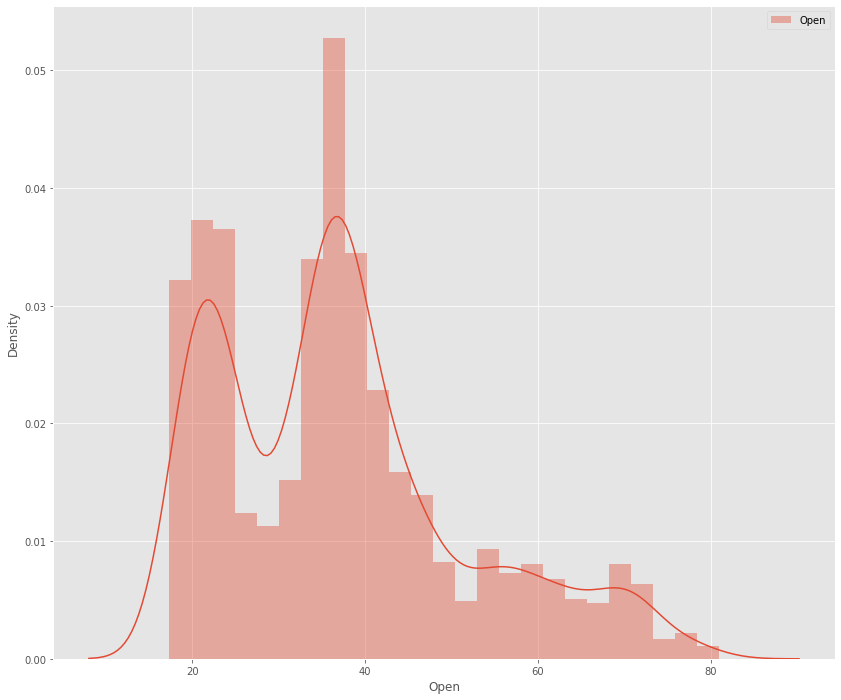

In [55]:
plt.figure(figsize = (14,12))
sns.distplot(df['Open'],
            bins =25,
            label = 'Open')
plt.legend()
plt.xlabel('Open')

In [56]:
kf = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = df['Close'].values[0],
                  initial_state_covariance = 1,
                  observation_covariance=1,
                  transition_covariance=.01)

In [57]:
state_means,_ = kf.filter(df[['Close']].values)
state_means = pd.Series(state_means.flatten(), index=df.index)

In [58]:
#Defining the Mean Square Error

def RMSE(y,y_hat):
    difference = y-y_hat
    difference_square = difference**2
    mean_squared_difference = np.mean(difference_square)
    root_mean_squared_difference = np.sqrt(mean_squared_difference)
    return root_mean_squared_difference

In [59]:
print(df['Close'].values.mean())
RMSE(df['Close'], state_means)

37.17646813401581


1.7273988030311151

In [60]:
df["Date"] = pd.to_datetime(df.index)

mids = (df.Open + df.Close)/2
spans = abs(df.Close-df.Open)

inc = df.Close > df.Open
dec = df.Open > df.Close
w = 12*60*60*1000 # half day in ms

output_notebook()

TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=1000, toolbar_location="left",y_axis_label = "Price",
          x_axis_label = "Date")

p.segment(df.Date, df.High, df.Date, df.Low, color="black")
p.rect(df.Date[inc], mids[inc], w, spans[inc], fill_color='green', line_color="green")
p.rect(df.Date[dec], mids[dec], w, spans[dec], fill_color='red', line_color="red")
p.line(df.Date,state_means,line_width=1,line_color = 'blue',legend="Kalman filter")

#p.title("Implementation of Kalman Filter Estimation - TCS EOD chart")
p.xaxis.major_label_orientation = np.pi/4
p.grid.grid_line_alpha=0.3
plt.show()

Loading BokehJS ...

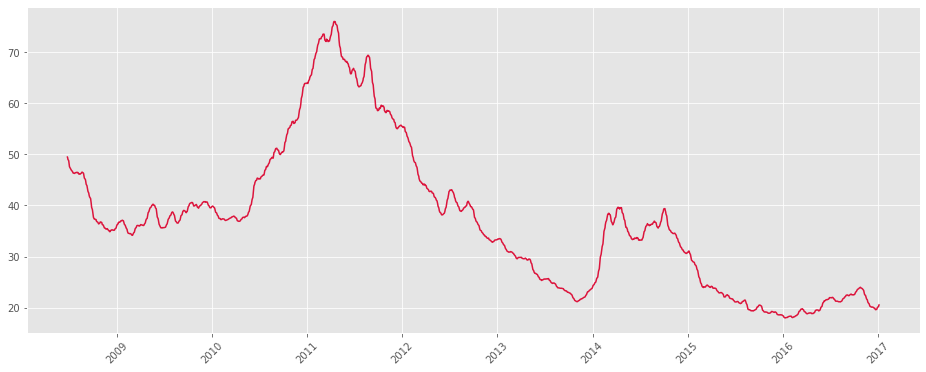

In [61]:
#The Predicted values
plt.figure(figsize = (16,6))
plt.plot(state_means, color ='crimson')
plt.xticks(rotation = 45)
plt.show()

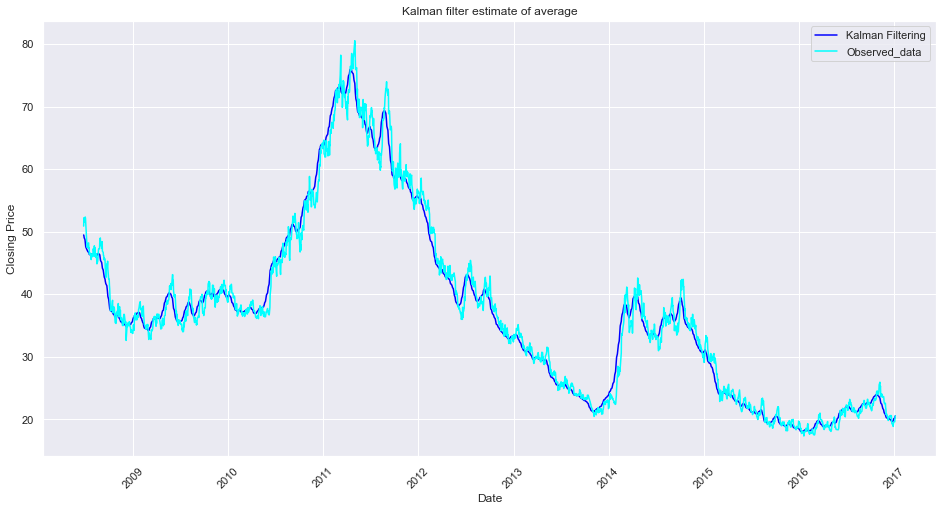

In [97]:
sns.set()
plt.figure(figsize=(16,8))
#colors = ['#2300A8', '#00A658']
plt.plot(df.Date,state_means,color='blue')
plt.plot(df.Date,df["Close"],color='cyan')
plt.legend(['Kalman Filtering','Observed_data'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Kalman filter estimate of average')
plt.xticks(rotation = 45)
plt.show()

c:\users\anurag\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

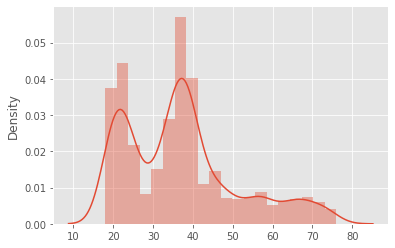

In [62]:
sns.distplot(state_means.values)

In [63]:
print("Actual  |  Predicted Values")
for i in range(0,20):
    print(df['Close'][i], end = "       ")
    print(state_means[i])

Actual  |  Predicted Values
20.540001       20.540001
20.209999       20.428543370860925
19.610001       20.21734166139256
19.559998999999998       20.07839915957832
19.290001       19.935504144669515
18.860001       19.762838866515665
19.17       19.676464521776342
19.27       19.621705350247023
19.719998999999998       19.63413206968474
20.57       19.74648028417165
20.469998999999998       19.82974362733693
20.620001000000002       19.91760064896817
20.360001       19.965414720402507
20.389999       20.010254474560607
20.549999       20.066187274059633
20.48       20.1084103667971
20.4       20.137787195392193
19.809998999999998       20.105105038545883
20.17       20.111520534519386
20.290001       20.12904243455641


In [77]:

import statsmodels.tsa.api as smt
endog = df.Close
exog = sm.add_constant(df[['Close','High','Low','Open','Volume']])
ar_mod = smt.statespace.SARIMAX(endog, order=(0,1,0), seasonal_order=(1,1,1,12))
ar_res = ar_mod.fit()

c:\users\anurag\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\anurag\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:587: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
c:\users\anurag\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\anurag\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:587: ValueWarning: A date in

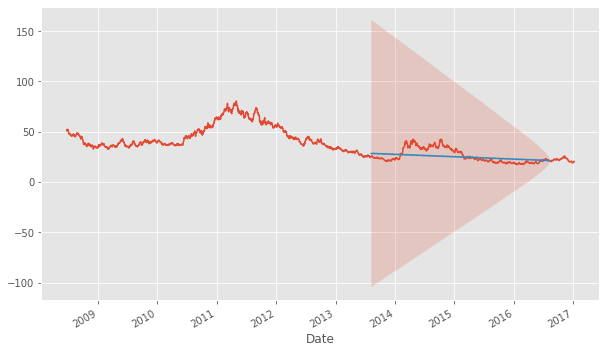

In [79]:
ar_p = ar_res.get_prediction('2016-08-08', '2013-08-08', dynamic=True)

fig, ax = plt.subplots(figsize=(10,6))
df.Close.plot(ax=ax)
ar_p.predicted_mean.plot(ax=ax)
ar_p_ci = ar_p.conf_int()
_=ax.fill_between(ar_p_ci.index, ar_p_ci['lower Close'], ar_p_ci['upper Close'], alpha=0.2)